<a href="https://colab.research.google.com/github/fika051199/Telco-Churn/blob/main/Telco_Churn_EDA_Revisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata

1. Customers who left within the last month – the column is called Churn 
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents



### Business Understanding
Perusahaan mengalami kerugian dikarenakan banyaknya customer yang berhenti berlangganan atau biasa disebut ( Churn ). 
Dari sini kita perlu memahami mengapa churn terjadi dengan jumlah yang besar sehingga Business dapat memberi treatment kepada customer agar tetap loyal


### Mounting with your Google Drive

In [ ]:
#mounting with ur g drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Library and Load Data set

In [ ]:
#import library 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import data from google drive 
data = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Data Cleansing

In [ ]:
#Priview Data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1021,3422-WJOYD,Male,0,Yes,No,28,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,54.35,1426.45,No
5872,4550-EVXNY,Female,0,No,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.65,69.65,Yes
5460,6551-VLJMV,Male,0,Yes,No,34,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.05,679,No
6909,9108-EJFJP,Female,0,Yes,No,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.55,53.55,No
3865,5701-SVCWR,Female,0,No,Yes,1,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,24.00,24,No


Observation:

* tenure, MonthlyCharges, and TotalCharges columns are numeric.
* SeniorCitizen is apparently a binary (0,1)
* Other columns appear to be object/nominal data that has contain 2 or more than 2 values (Female/Male, Yes/No/other, others).
* all Column names will be changed to small (optional)

In [ ]:
# lowering name columns in data (optional)
data.columns = data.columns.str.lower()

In [ ]:
# exclude rows that contain whitespace from totalcharges columns (Filtering)
data = data.loc[~data['totalcharges'].str.contains(' ')]

### Data Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 


* Data contains 21 columns with 7042 rows.
* The entries changed to 7032 after filtering step
* TotalCharges dtypes is inappropriate. It will be changed to float64

In [ ]:
#Change totalcharges to numeric ( float64)
data['totalcharges'] = data['totalcharges'].astype(float)

In [ ]:
#recheck info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 


In [ ]:
# percentage Missing Values
data.isna().sum() * 100 / len(data)

customerid          0.0
gender              0.0
seniorcitizen       0.0
partner             0.0
dependents          0.0
tenure              0.0
phoneservice        0.0
multiplelines       0.0
internetservice     0.0
onlinesecurity      0.0
onlinebackup        0.0
deviceprotection    0.0
techsupport         0.0
streamingtv         0.0
streamingmovies     0.0
contract            0.0
paperlessbilling    0.0
paymentmethod       0.0
monthlycharges      0.0
totalcharges        0.0
churn               0.0
dtype: float64

Observation

* No missing values

### Duplicated Data

In [ ]:
# check duplicated data
data.duplicated().sum()

0

Observation:
* No duplicated data

#### Separate columns into numerical and categorical

In [ ]:
# Separate columns into numerical and categorical
all_columns = data.columns.to_list()
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = list(set(all_columns) - set(numerical))

In [ ]:
# Converting value in seniorcitizen columns

data['seniorcitizen'] = data['seniorcitizen'].replace(0, 'No').replace(1, 'Yes')

In [ ]:
# check for odd values in categorical columns, such as string "-", or other
for i in data[categorical].columns:
    x = data[categorical][i].value_counts()
    print(i)
    print(x,'\n')

paperlessbilling
Yes    4168
No     2864
Name: paperlessbilling, dtype: int64 

dependents
No     4933
Yes    2099
Name: dependents, dtype: int64 

multiplelines
No                  3385
Yes                 2967
No phone service     680
Name: multiplelines, dtype: int64 

streamingmovies
No                     2781
Yes                    2731
No internet service    1520
Name: streamingmovies, dtype: int64 

churn
No     5163
Yes    1869
Name: churn, dtype: int64 

streamingtv
No                     2809
Yes                    2703
No internet service    1520
Name: streamingtv, dtype: int64 

partner
No     3639
Yes    3393
Name: partner, dtype: int64 

onlinebackup
No                     3087
Yes                    2425
No internet service    1520
Name: onlinebackup, dtype: int64 

contract
Month-to-month    3875
Two year          1685
One year          1472
Name: contract, dtype: int64 

seniorcitizen
No     5890
Yes    1142
Name: seniorcitizen, dtype: int64 

deviceprotection
No     

## Observation
* No odd value
* For some columns, there are 'No internet service' and 'No phone service'. For analysis further and make modelling, they can be changed to 'No' because both of them are same with 'No'

### Exploratory Data Analysis

##Statistical Summary of Columns

In [ ]:
data[numerical].describe()

,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## Observation
* Overall, the minimum and maximum values make sense for each column.
* Mean is not close to 50% (Median) in `tenure`, `monthlyCharges`, and `totalcharges` column, indicating somewhat not symmetrical distribution

In [ ]:
data[categorical].describe()

,paperlessbilling,dependents,multiplelines,streamingmovies,churn,streamingtv,partner,onlinebackup,contract,seniorcitizen,deviceprotection,onlinesecurity,techsupport,gender,internetservice,paymentmethod,customerid,phoneservice
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,3,3,2,3,2,3,3,2,3,3,3,2,3,4,7032,2
top,Yes,No,No,No,No,No,No,No,Month-to-month,No,No,No,No,Male,Fiber optic,Electronic check,7590-VHVEG,Yes
freq,4168,4933,3385,2781,5163,2809,3639,3087,3875,5890,3094,3497,3472,3549,3096,2365,1,6352


Observations:
* Some columns have 2, 3 or 4 unique value.
* Percentage of male and female customer in `gender` is relatively same.
* Most of internet service using fiber optic.
* Most of the customers has a phone service (90%).
* 70% customer has no dependants.
* Percentage of customer that has partner and no partner is relatively same.
* 73% of the customers is not churn.
* All `customerID` is unique. We may neglect this column for further analysis.

### Univariate Analysis

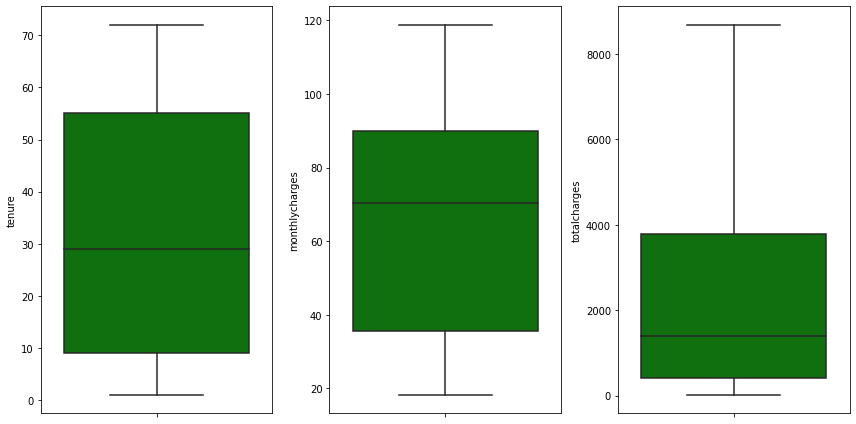

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='green')
    plt.tight_layout()

## Observation

* There is no outlier in `tenure`, `monthlycharges`, and `totalcharges` column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

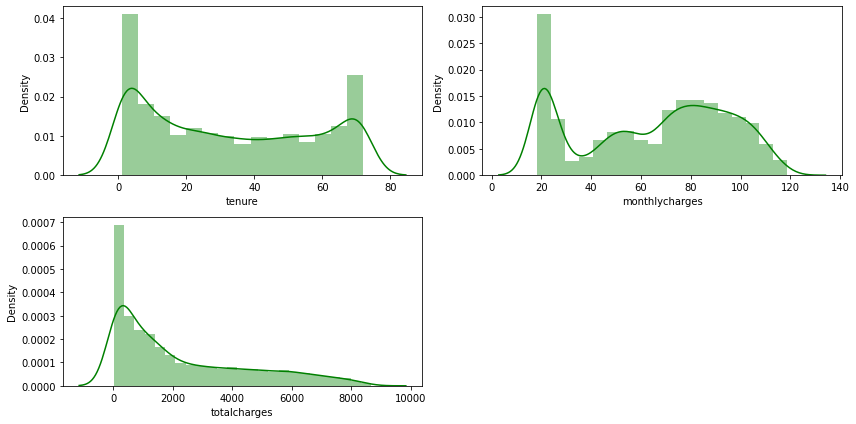

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

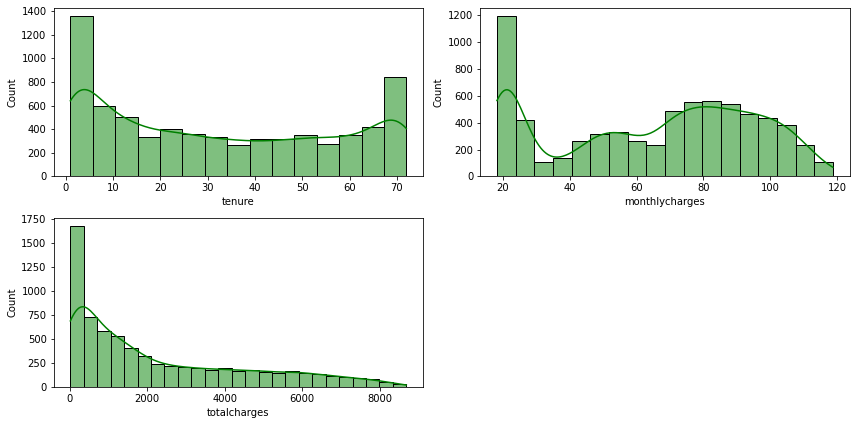

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=data[features[i]], color='green', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
# check distribution peak for every column in numerical
for i in data[numerical].columns:
    x = data[numerical][i].mode()
    print(i)
    print(x,'\n')

tenure
0    1
dtype: int64 

monthlycharges
0    20.05
dtype: float64 

totalcharges
0    20.2
dtype: float64 



##Observation
* Most customer has distribution peak `Tenure = 1 month`, `MonthlyCharges ~ 20`, `TotalCharges ~ 20`.
* `Tenure` column has U-shape distribution, `MonthlyCharges` column has bimodal distribution, `TotalCharges` column has J-shape distribution.
* The highest number of customers have a short term tenure. And also a high number of customers has a long term tenure.

### Bivariate Analysis

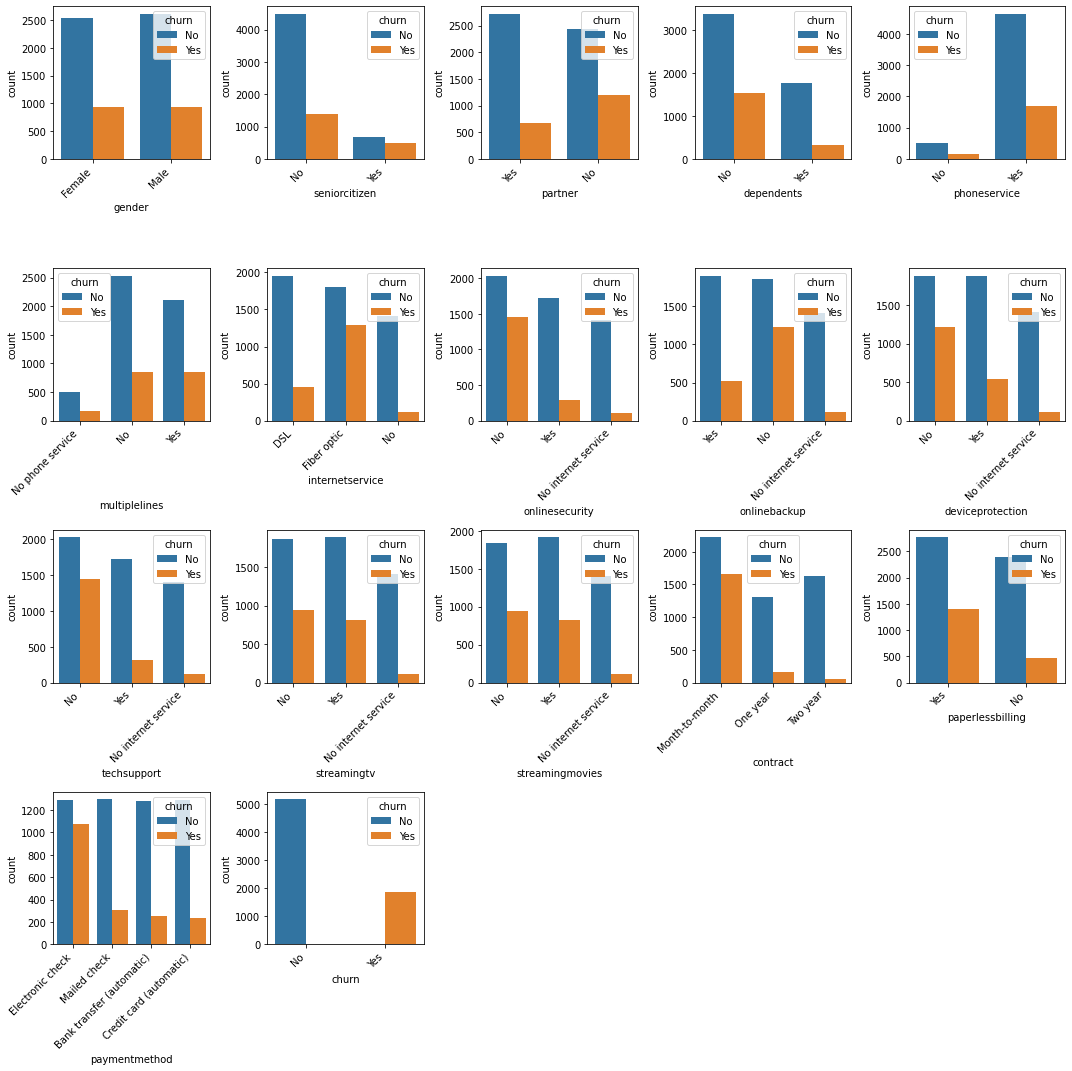

In [ ]:
# Setup figure
cols = 5
rows = 4
fig = plt.figure(figsize= (15,15))

# Plotting
all_categorics = data.select_dtypes(include='object')
categoric_columns = all_categorics.columns[all_categorics.nunique()<5]
for i, col in enumerate(categoric_columns):
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=data[col], hue='churn', data=data, ax=ax)    
    plt.xticks(rotation=45, ha='right')
fig.tight_layout()  
plt.show()

Observasi :
* `gender` doesnt seem affect churn rate.
* `seniorcitizen`, dominated by the senior that LEAVE the service.
* `partner`, customer without partner tend to LEAVE the service.
* `dependents`, customer without `dependents` tend to LEAVE the service.
* `phoneservice` doesnt seem affect the `churn` rate.
* `multiplelines`, customer with `No phone service` tend to RETAIN the service.
* `internetservice`, customer that choose `Fiber optic` tend to LEAVE the service.
* `churn` rate HIGHER in customer that has NO `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`, `streamingtv`, and `streamingmovies` service.
* `contract`, customer with `Month-to-Month` tend to LEAVE the service.
* `paperlessbilling` has HIGHER `churn` rate.
* `paymentmethod` with `Electronic check` have the HIGHEST `churn` rate compared to another method.

## Multivariate Analysis

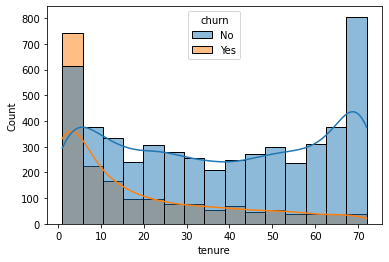

In [ ]:
sns.histplot(data=data,
            x='tenure',
            hue='churn', alpha=0.5, kde=True)

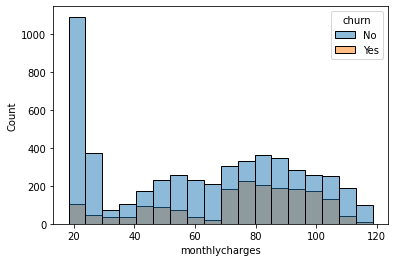

In [ ]:
sns.histplot(data=data,
            x='monthlycharges',
            hue='churn', alpha=0.5)

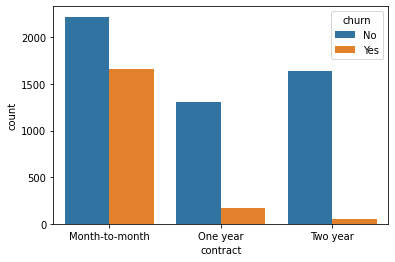

In [ ]:
sns.countplot(data = data, 
              x = 'contract', 
              hue = 'churn')
plt.show()

Observation:

* The churn rate decreases as the tenure increase. Good maintain for long time customer.
* Churn rate among customers use very cheap plans in monthly charges is low. And churn rate among high spender customer is high (70 - 100 USD).
* Most churn customers purchased a short term month-to-month contract.

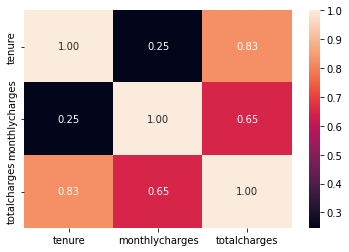

In [ ]:
# correlation heatmap df
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

## Observation
* `Tenure` and `TotalCharges` are highly correlated each other
* Low correlation for other columns

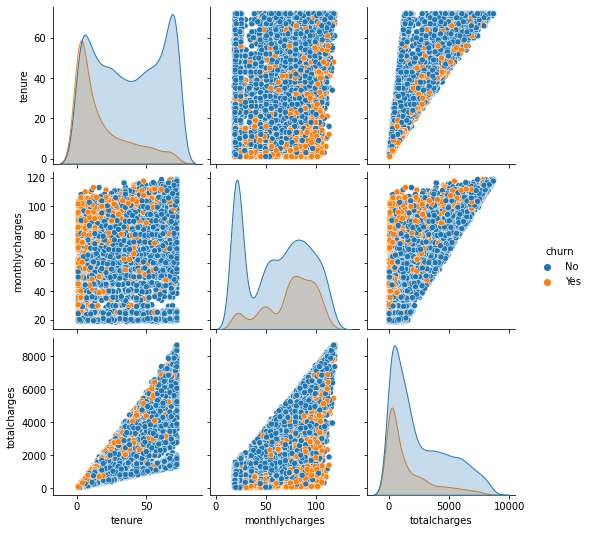

In [ ]:
sns.pairplot(data, hue='churn')

Observation:

* The churn rate decreases as the tenure increase. Good maintain for long time customer
* Higher monthly charges tend to have higher churn percentage

## Conclusion
1. The data does not contain major issues. No NULL values, no duplicated rows and no odd values. We drop null values due to small in proportion (< 5%) and `Churn` = No.
2. Overall, the minimum and maximum values make sense for each column.
3. Most columns appear to be object/nominal data that has contain 2 or more than 2 values (Female/Male, Yes/No/other, others).
4. `TotalCharges` dtypes is inappropriate. It has been changed to float64.
5. All of the columns with continuous numerical values are not symmetric.
6. Most of the customers has a phone service (90%).
7. 73% of the customers is not churn.
8. From histogram plot of `Tenure` and `Churn` column, we can say that the churn rate decreases as the tenure increase. Good maintain for long time customer.
9. Churn rate among customers use very cheap plans in monthly charges is low. And churn rate among high spender customer is high (70 - 100 USD).
10. Most churn customers purchased a short term month-to-month contract.
11. Tenure and contract duration seems to be strong factors for churn
12. From correlation heatmap: We can see that `Tenure` and `TotalCharges` are highly correlated each other.
13. From pairplot: We can see that higher monthly charges tend to have higher churn percentage